# Event-data Representation and Visualization

The **goals** of this exercise are:
- to familiarize yourself with the data produced by an event-based camera
- to practice converting the event data into image-like (also called "grid-based" or "array-based") representations, which is a common practice of many algorithms (without judging whether it is "optimal" or not).
- to produce "pretty plots" (never underestimate the value of good figures on reports and papers).

For this exercise let us use data from the `slider_depth` sequence in the [Event Camera Dataset and Simulator (IJRR'17)](http://rpg.ifi.uzh.ch/davis_data.html). A small portion of this data is provided in the folder `/slider_depth`". The reasons to use this file are that it is available in simple txt format and that it is small (i.e., manageable). 

The sequences in the above-mentioned dataset were recorded with a DAVIS240C camera (from iniVation) and they also contain grayscale frames, recorded at about 25 Hz (frames per second). The frames can be helpful to get a better idea of the scene. Once you are comfortable with the exercise, feel free to use other sequences or data from other publicly available [datasets](https://github.com/uzh-rpg/event-based_vision_resources/blob/master/README.md#datasets-sorted-by-topic).

This exercise is not as guided as the first one. Instead of filling in the blanks, here we show the plots and you are asked to write code to produce such plots (approximately). You may use tools such as numpy and matplotlib. If possible, try also to write it nicely, using resuable functions.

# Contents
### 2D Representation
* x, y, p 사용해서 이미지 생성
    * p 종류
        * Data에서 polarity at each pixel 축적.
        * Last event polarity at each pixel.
        * Histogram of positive event. (각 픽셀의 postive event의 개수가 pixel 값)
        * Histogram of negative event. (각 픽셀의 negative event의 개수가 pixel 값)
* x, y, t
    * t 종류
        * Exponential decay timestamp with both polarity
        * Exponential decay timestamp with positive polarity
        * Exponential decay timestamp with negative polarity
        * Avg. timestamp with both polarity
        * Avg. timestamp with positive polarity
        * Avg. timestamp with neagtive polarity
        
### 3D Representation
* x, t, t 
    * x,y,t 축으로 3D 그래프가 형성
        * Without polarity
        * With polarity
            * positive/negative polarity를 기준으로 색을 구분하여 점 찍음.
* Voxel grid representation
    * ?

# Data format

Events in the txt files of the IJRR'17 dataset are given one per line. For example, the first ten lines of the slider_depth txt file are:

    0.003811000 96 133 0
    0.003820001 127 171 0
    0.003836000 4 160 0
    0.003837000 149 122 0
    0.003848001 63 121 1
    0.003849001 17 144 1
    0.003852000 92 119 0
    0.003866001 16 137 1
    0.003875000 156 71 0
    0.003879000 26 149 0

That is, data is given in the form:

    t, x, y, p

timestamp $t$ (in seconds), $x$ pixel coordinate (horizontal or column index), $y$ pixel coordinate (vertical coordinate or row index) and polarity $p$ (1 bit of information with the sign of the brightness change: 1 if positive, 0 if negative). Since the DAVIS240C has a spatial resolution of 240 x 180 pixels, $x$ and $y$ adopt values in $\{0,\ldots,239\}$ and $\{0,\ldots,179\}$, respectively.

Your first task is to read the data from file (loading it into temporal variables).

In [9]:
import os
import numpy as np
from matplotlib import pyplot as plt

Here is some code to read the data in a txt file with the format shown above

In [10]:
# Simple code. There may be more efficient ways.
def extract_data(filename):
    infile = open(filename, 'r')
    timestamp = []
    x = []
    y = []
    pol = []
    for line in infile:
        words = line.split()
        timestamp.append(float(words[0]))
        x.append(int(words[1]))
        y.append(int(words[2]))
        pol.append(int(words[3]))
    infile.close()
    return timestamp,x,y,pol

In [11]:
filename_sub = 'slider_depth/events_chunk.txt'
# Call the function to read data    
timestamp, x, y, pol = extract_data(filename_sub)

For this exercise, let us provide the sensor size (height, width)

In [12]:
img_size = (180,240)

# Space-time plot

The following figure shows a visualization of (the first 2000) events in space-time (image plane of the camera amd time).

![Events, space-time and polarity](images/space_time_pol.png)

Let us first try to plot something simpler (with fewer dimensions).
The following plots were generated with events between $N_e=5000$ and $N_e = 50000$.

# <span style="color:purple">Image-like (2D grid) representation</span>

## <span style="color:green"> 1. Histograms of events (Event count)</span>
You are asked to write Python code to create the following image. It has been generated by accumulating the event polarities pixel-wise from the first $N_e=5000$ in the file.

![balance_polarities_gray](images/balance_polarities_gray.png)

Brightness incremet image: numevents =  5000


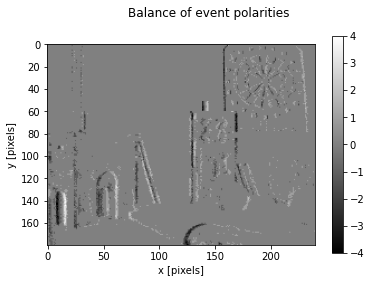

In [13]:
# 5000개의 이벤트에서 픽셀 x,y 좌표의 polarity 값을 축적해서 하나의 이미지에 표현한다.

# %% Brightness incremet image (Balance of event polarities)
num_events = 5000  # Number of events used
print("Brightness incremet image: numevents = ", num_events)

# Compute image by accumulating polarities.
img = np.zeros(img_size, np.int)
for i in range(num_events):
    # Need to convert the polarity bit from {0,1} to {-1,+1} and accumulate
    img[y[i],x[i]] += (2*pol[i]-1)
    
    # Display the image in grayscale
fig = plt.figure()
fig.suptitle('Balance of event polarities')
maxabsval = np.amax(np.abs(img))
plt.imshow(img, cmap='gray', clim=(-maxabsval,maxabsval))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

- What do the "three colors" in the image represent?
- What is the maximum number of positive events at any pixel?
- and the maximum number of negative events at any pixel?
- What could such an image be used for?

In [14]:
# Write your answers...

Next, consider using [pseudocolor](https://en.wikipedia.org/wiki/False_color) to display the events. Write code to generate the following image.

![balance_polarities_red_blue](images/balance_polarities_red_blue.png)

- What do the white, red and blue colored pixels represent?
- Why is blue color used instead of green color?

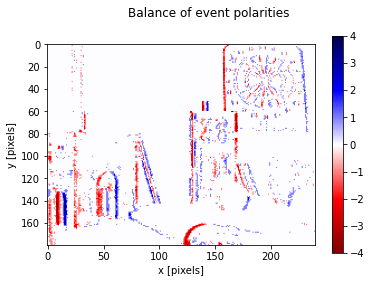

In [15]:
# Same plot as above, but changing the color map
fig = plt.figure()
fig.suptitle('Balance of event polarities')
maxabsval = np.amax(np.abs(img))
plt.imshow(img, cmap='seismic_r', clim=(-maxabsval,maxabsval))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

Please write code to plot an image where every pixel may have only three possible values (ternary image): -1, 0, 1. You may set every pixel using, for example, the last event polarity at that pixel.

![ternary_gray](images/ternary_gray.png)

- What could this type of representation be good for compared to the histogram one (above)?

Next, you are asked to split by polarity, that is, to compute and plot one histogram of events for each event polarity. One for positive events and one for negative events, as shown next.

![](images/hist2d_pos_veridi.png)
![](images/hist2d_neg_veridi.png)

- Can you clearly identify both polarities in the moving edges?

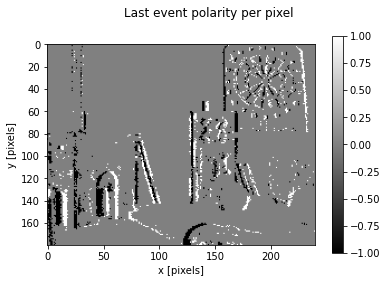

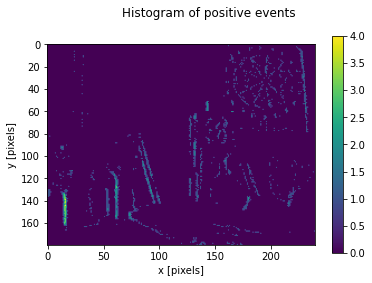

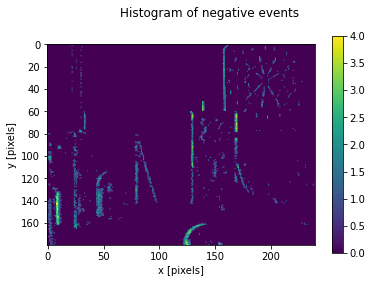

In [16]:
# 5000개의 이벤트에서 각 픽셀의 마지막 polarity만 표현한다.

# %% Thresholded brightness increment image (Ternary image)

# What if we only use 3 values in the event accumulation image?
# Saturated signal: -1, 0, 1
# For example, store the polarity of the last event at each pixel
img = np.zeros(img_size, np.int)
for i in range(num_events):
    img[y[i],x[i]] = (2*pol[i]-1)  # no accumulation; overwrite the stored value

# Display the ternary image
fig = plt.figure()
fig.suptitle('Last event polarity per pixel')
plt.imshow(img, cmap='gray')
#plt.imshow(img, cmap='bwr')
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

# -----------------------------------------------------------------------------------------------------

# postivie polarity(1) / negative polarity(2) 를 구분하여 축적한 이미지 생성.

# %% 2D Histograms of events, split by polarity (positive and negative events in separate images)
img_pos = np.zeros(img_size, np.int)
img_neg = np.zeros(img_size, np.int)
for i in range(num_events):
    if (pol[i] > 0):
        img_pos[y[i],x[i]] += 1 # count events
    else:
        img_neg[y[i],x[i]] += 1

fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

=====================================================================================================================
## <span style="color:green">2. Images of timestamps</span>

Polarity를 사용하지 않고 timestamp만 사용해서 이미지 생성.

Other useful representations are those that, instead of counting events at every pixel, just show a timestamp per pixel. It could be the last timestamp, an average timestamp or a timestamp composed with an exponential decay.
They are also called "time surfaces", "time maps" or "surface of active events".

### Time maps with exponential decay

Next, write code to replicate the type of time-images of the [2015 PAMI paper HOTS, Fig. 2](https://www.neuromorphic-vision.com/public/publications/1/publication.pdf).
Use 50000 events to better see the traces of the edges as they trigger events when they move through the image plane.

$ image(x,y; t) = exp(-|t-T(x,y)| / \tau) $

This is equation (3) in the above paper. The paper uses $\tau = 50$ ms (see the bottom of page 8). For the plots below, a value $\tau = 30$ ms is used. $\tau$ is a tunable parameter that depends on the motion in the scene.
Note that the paper uses a neighborhood ("context") of size $(2R+1)\times (2R+1)$ centered at the last event. Instead, you are aked to visualize the time surface using all image pixels (not a subset of them).

Also note that the paper uses the polarity $p$ as an argument of the time map $T$, while here it is not explicitly written. The following figure shows both polarities on the same time map, which is not easy to write with such a notation.

![](images/ts_exp_pol.png)

Next, you are asked to split by polarity, creating one plot for each event polarity:

![](images/ts_exp_pos.png)
![](images/ts_exp_neg.png)

- Describe what you see in this representation and whether it is better or not to split by polarity. In what situations?
- Is there the same amount of noise on both type of events (positive, negative)?

<!-- ![](images/ts_exp_pol_red_blue.png) 
![](images/ts_exp_balance_pol_red_blue.png) -->

Time surface: numevents =  50000


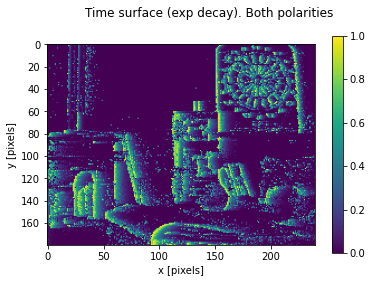

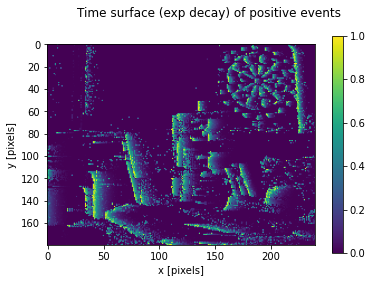

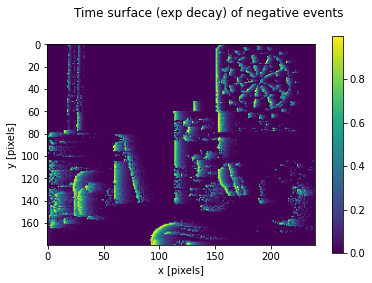

In [17]:
# %% Time surface (or time map, or SAE="Surface of Active Events")
num_events = len(timestamp)
print("Time surface: numevents = ", num_events)

img = np.zeros(img_size, np.float32)
t_ref = timestamp[-1] # time of the last event in the packet
tau = 0.03 # decay parameter (in seconds)
for i in range(num_events):
    img[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)

fig = plt.figure()
fig.suptitle('Time surface (exp decay). Both polarities')
plt.imshow(img)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()


# %% Time surface (or time map, or SAE), separated by polarity
sae_pos = np.zeros(img_size, np.float32)
sae_neg = np.zeros(img_size, np.float32)
for i in range(num_events):
    if (pol[i] > 0):
        sae_pos[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)
    else:
        sae_neg[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)

fig = plt.figure()
fig.suptitle('Time surface (exp decay) of positive events')
plt.imshow(sae_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Time surface (exp decay) of negative events')
plt.imshow(sae_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

### Average timestamp images.
In this type of representation, each pixel contains the average timestamp of the events that happened in it in the last few milliseconds. (There is no exponential decay, just an average).

![](images/t_ave_both_pols.png)

Next, split by polarity:

![](images/t_ave_pos.png)
![](images/t_ave_neg.png)

- Describe what you oberve compared to previous representations.

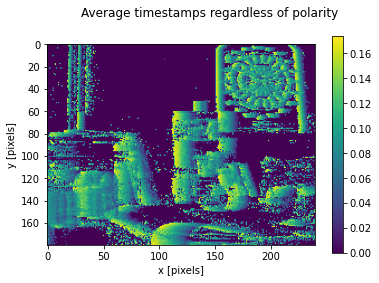

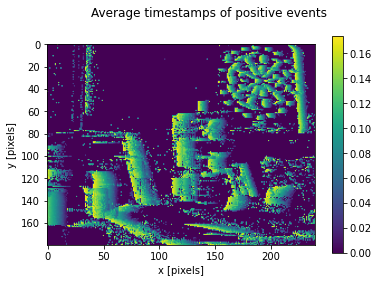

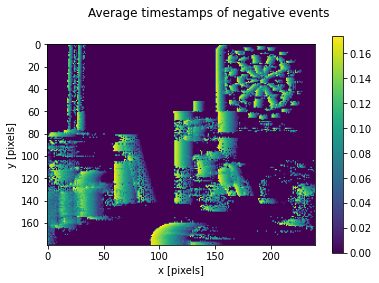

In [18]:
# %% Average timestamp per pixel
sae = np.zeros(img_size, np.float32)
count = np.zeros(img_size, np.int)
for i in range(num_events):
    sae[y[i],x[i]] += timestamp[i]
    count[y[i],x[i]] += 1
    
# Compute per-pixel average if count at the pixel is >1
count [count < 1] = 1  # to avoid division by zero
sae = sae / count

fig = plt.figure()
fig.suptitle('Average timestamps regardless of polarity')
plt.imshow(sae)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

# %% Average timestamp per pixel. Separate by polarity
sae_pos = np.zeros(img_size, np.float32)
sae_neg = np.zeros(img_size, np.float32)
count_pos = np.zeros(img_size, np.int)
count_neg = np.zeros(img_size, np.int)
for i in range(num_events):
    if (pol[i] > 0):
        sae_pos[y[i],x[i]] += timestamp[i]
        count_pos[y[i],x[i]] += 1
    else:
        sae_neg[y[i],x[i]] += timestamp[i]
        count_neg[y[i],x[i]] += 1
    
# Compute per-pixel average if count at the pixel is >1
count_pos [count_pos < 1] = 1;  sae_pos = sae_pos / count_pos
count_neg [count_neg < 1] = 1;  sae_neg = sae_neg / count_neg

fig = plt.figure()
fig.suptitle('Average timestamps of positive events')
plt.imshow(sae_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Average timestamps of negative events')
plt.imshow(sae_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

=====================================================================================================================
#  <span style="color:green">3. Space-time plots</span>

Next, we take a look at different ways to visualize events in space-time. Such a space-time is obtained by considering a temporal window of the signal that is output by the camera as a response of the light arriving at the image plane (i.e., the "retina").

## Point set

Write Python code to plot the first $N_e = 2000$ events in space-time, like a point set or point "cloud":

![Events, space-time and polarity](images/space_time_pol.png)

You may find the [3D scatterplot example](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) useful.

Try experimenting by moving around the viewpoint (clicking on the figure generated by Python's matplotlib).

- For us, humans, is the information more intelligible from any specific viewpoint?
- What information do you gain by looking at this point cloud from directions parallel to each of the coordinate axes?

Then, write a function to generate a short **[movie](movie.mp4)** that smoothly shows the intermediate viewpoints between two specified ones (the start and end viewpoints). See the following VLC player screenshot.
Suggestion: use the matplotlib command `ax.view_init(azim=XXX,elev=ZZZ)`. Write images to disk and create a movie from them using ffmpeg. There is no need to install ffmpeg; you may use the [static build](https://johnvansickle.com/ffmpeg/). Video [coding options](https://trac.ffmpeg.org/wiki/Encode/H.264), such as lossless.

![movie snapthot on VLC](images/movie_vlc_pointset.png)

Space-time plot and movie: numevents =  2000


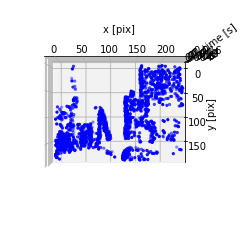

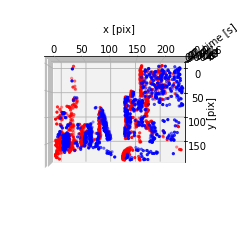

Directory  tempDir  already exists


<Figure size 432x288 with 0 Axes>

In [19]:
# %% 3D plot 
# Time axis in horizontal position

m = 2000 # Number of points to plot
print("Space-time plot and movie: numevents = ", m)

# Plot without polarity
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.set_aspect('equal') # only works for time in Z axis
ax.scatter(x[:m], timestamp[:m], y[:m], marker='.', c='b') # timestamp별로 x,y 점 찍음.
ax.set_xlabel('x [pix]')
ax.set_ylabel('time [s]')
ax.set_zlabel('y [pix] ')
ax.view_init(azim=-90, elev=-180) # Change viewpoint with the mouse, for example
plt.show()


# %% Plot each polarity with a different color (red / blue)
idx_pos = np.asarray(pol[:m]) > 0 # polarity가 1인 인덱스 저장
idx_neg = np.logical_not(idx_pos) # polarity가 0인 인덱스 저장
xnp = np.asarray(x[:m])
ynp = np.asarray(y[:m])
tnp = np.asarray(timestamp[:m])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xnp[idx_pos], tnp[idx_pos], ynp[idx_pos], marker='.', c='b') # polarity가 1인 timestamp,x,y 그래프 그림
ax.scatter(xnp[idx_neg], tnp[idx_neg], ynp[idx_neg], marker='.', c='r') # polarity가 0인 timestamp,x,y 그래프 그림
ax.set(xlabel='x [pix]', ylabel='time [s]', zlabel='y [pix]')
ax.view_init(azim=-90, elev=-180)
plt.show()


# %% Transition between two viewpoints
num_interp_viewpoints = 60 # number of interpolated viewpoints
ele = np.linspace(-150,-180, num=num_interp_viewpoints)
azi = np.linspace( -50, -90, num=num_interp_viewpoints)

# Create directory to save images and then create a movie
dirName = 'tempDir'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")
    
for ii in range(0,num_interp_viewpoints):
    ax.view_init(azim=azi[ii], elev=ele[ii])
    plt.savefig(dirName + "/movie%04d.png" % ii)

# %% Create a movie using ffmpeg static build (https://johnvansickle.com/ffmpeg/)
# Video coding options, such as lossless: https://trac.ffmpeg.org/wiki/Encode/H.264
def createMovie():
    os.system("/home/ggb/Downloads/ffmpeg-4.2.2-i686-static/ffmpeg -r 20 -i " 
    + dirName  + "/movie%04d.png -c:v libx264 -crf 0 -y movie_new.mp4")

# Call the function to create the movie
createMovie()

# 현재 directory에서 movie.mp4

=====================================================================================================================
##  <span style="color:green"> 4. Voxel grid representation</span>

Next, you are asked to write code to convert the event data into a 3D histogram. To this end, events shall be collected into bins: 1 bin per pixel in space and say 5 bins in time. Feel free to write your own function to compute the 3D histogram or to use numpy's [histogramdd](https://numpy.org/doc/stable/reference/generated/numpy.histogramdd.html?highlight=histogramdd#numpy.histogramdd) function. Actually it is good to compute the histogram using both methods and making sure that both agree.

### Regular histogram
Write python code to compute the 3D histogram and display it as a voxel grid. 
Every voxel counts the number of events falling (i.e., binned) within it, regardless of polarity.
Suggestion: [this sample code](https://matplotlib.org/3.1.1/gallery/mplot3d/voxels_rgb.html#sphx-glr-gallery-mplot3d-voxels-rgb-py)

![voxel histogram](images/voxel_nn.png)

- What are the minimum and maximum number of events at any voxel?
- How many voxels are there? How many are "occupied" (i.e., have a non-zero value)? (voxel grids are also known as "occupancy maps" in Robotics). What is the ratio between these numbers? (How sparse is the data?)

### Interpolated histogram
(Smooth histogram that also includes polarity information).
Next, modify the code you have written to include polarity. That is, instead of counting events on every bin, "count" the polarity. Moreover, to make the histogram smoother, use a linear voting scheme by which an event splits its polarity in its two closest temporal bins. The split takes into account the distance from the event to both bins. (This idea of smoothing a histogram is similar to the idea of kernel density estimation). The following plot illustrates this idea of "smoothing" the histogram.

![histogram smoothing](images/histogram_smoothing.png)

The next figure shows the voxel grid obtained by using linear voting of polarity (per-voxel balance of linearly-interpolated polarity). Grayscale values are used: dark values represent negative events (voxels with negative balance of polarities) and bright values represent positive events (voxels with positive balance of polarities).

![voxel linear voting with polarity](images/voxel_linvote_pol.png)

- What are the minimum and maximum value of the balance of event polarities at the voxels?
- Does this way of computing the histogram, including polarity, affect the above "sparsity ratio"?
- How does this (3D) voxel grid representation compare to 2D representations? For example in terms of memory, in terms of preservation of the information contained in the event data?
- What could the voxel grid representation be good for?
- How would you interpret the above voxel grid in terms of a continuous "polarity field" $p(x,y,t)$ or the temporal derivative of the brightness signal arriving at the sensor $\frac{\partial L}{\partial t}(x,y,t)$?

In [20]:
# %% Voxel grid

num_bins = 5
print("Number of time bins = ", num_bins)

t_max = np.amax(np.asarray(timestamp[:m]))
t_min = np.amin(np.asarray(timestamp[:m]))
t_range = t_max - t_min
dt_bin = t_range / num_bins # size of the time bins (bins)
t_edges = np.linspace(t_min,t_max,num_bins+1) # Boundaries of the bins

# Compute 3D histogram of events manually with a loop
# ("Zero-th order or nearest neighbor voting")
hist3d = np.zeros(img.shape+(num_bins,), np.int)

for ii in range(m):
    idx_t = int( (timestamp[ii]-t_min) / dt_bin )
    if idx_t >= num_bins:
        idx_t = num_bins-1 # only one element (the last one)
    hist3d[y[ii],x[ii],idx_t] += 1

# Checks:
print("hist3d")
print (hist3d.shape)
print (np.sum(hist3d)) # This should equal the number of votes

Number of time bins =  5
hist3d
(180, 240, 5)
2000



hist3dd
min =  0.0
max =  1.0
2000.0
0.0
Ratio of occupied bins =  0.009259259259259259


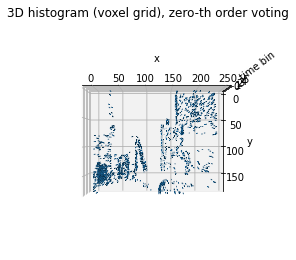

In [21]:
# %% Compute 3D histogram of events using numpy function histogramdd
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogramdd.html#numpy.histogramdd

# Specify bin edges in each dimension
bin_edges = (np.linspace(0,img_size[0],img_size[0]+1), 
             np.linspace(0,img_size[1],img_size[1]+1), t_edges)
yxt = np.transpose(np.array([y[:m], x[:m], timestamp[:m]]))
hist3dd, edges = np.histogramdd(yxt, bins=bin_edges)

# Checks
print("\nhist3dd")
print("min = ", np.min(hist3dd))
print("max = ", np.max(hist3dd))
print(np.sum(hist3dd))
print(np.linalg.norm(hist3dd - hist3d)) # Check: zero if both histograms are equal
print("Ratio of occupied bins = ", np.sum(hist3dd > 0) / float(np.prod(hist3dd.shape)) )

# Plot of the 3D histogram. Empty cells are transparent (not displayed)
# Example: https://matplotlib.org/3.1.1/gallery/mplot3d/voxels_rgb.html#sphx-glr-gallery-mplot3d-voxels-rgb-py
fig = plt.figure()
fig.suptitle('3D histogram (voxel grid), zero-th order voting')
ax = fig.gca(projection='3d')
# prepare some coordinates
r, g, b = np.indices((img_size[0]+1,img_size[1]+1,num_bins+1))
ax.voxels(g,b,r, hist3d) # No need to swap the data to plot with reordered axes
ax.set(xlabel='x', ylabel='time bin', zlabel='y')
ax.view_init(azim=-90, elev=-180) # edge-on, along time axis
#ax.view_init(azim=-63, elev=-145) # oblique viewpoint
plt.show()

(180, 240, 5)

hist3d_interp
min =  0.0
max =  0.9997959058759576
1892.62485951419
17.558308329896132
Ratio of occupied bins =  0.01661574074074074


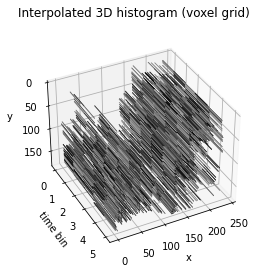

In [22]:
# %% Compute interpolated 3D histogram (voxel grid)
hist3d_interp = np.zeros(img.shape+(num_bins,), np.float64)

for ii in range(m-1):
    tn = (timestamp[ii] - t_min) / dt_bin # normalized time, in [0,num_bins]
    ti = np.floor(tn-0.5) # index of the left bin
    dt = (tn-0.5) - ti    # delta fraction
    # Voting on two adjacent bins
    if ti >=0 :
        hist3d_interp[y[ii],x[ii],int(ti)  ] += 1. - dt
    if ti < num_bins-1 :
        hist3d_interp[y[ii],x[ii],int(ti)+1] += dt

# Checks
print("\nhist3d_interp")
print("min = ", np.min(hist3d_interp))
print("max = ", np.max(hist3d_interp))
print(np.sum(hist3d_interp))
# Some votes are lost because of the missing last layer
print(np.linalg.norm( hist3d - hist3d_interp))
print("Ratio of occupied bins = ", np.sum(hist3d_interp > 0) / float(np.prod(hist3d_interp.shape)) )

# Plot voxel grid
colors = np.zeros(hist3d_interp.shape + (3,))
tmp = hist3d_interp/np.amax(hist3d_interp) # normalize in [0,1]
colors[..., 0] = tmp
colors[..., 1] = tmp
colors[..., 2] = tmp

fig = plt.figure()
fig.suptitle('Interpolated 3D histogram (voxel grid)')
ax = fig.gca(projection='3d')
ax.voxels(g,b,r, hist3d_interp, facecolors=colors)
ax.set(xlabel='x', ylabel='time bin', zlabel='y')
ax.view_init(azim=-63, elev=-145)
plt.show()

# %% A different visualization viewpoint
ax.view_init(azim=-90, elev=-180) # edge-on, along time axis
plt.show()

(180, 240, 5)

hist3d_interp_pol
min =  -0.9997959058759576
max =  0.9997954972791132
1892.62485951419
Ratio of occupied bins =  0.01661574074074074


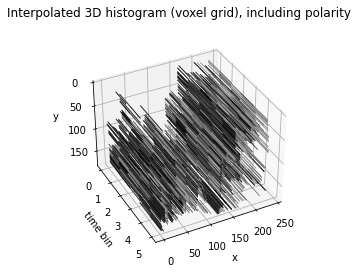

In [24]:
# %% Compute interpolated 3D histogram (voxel grid) using polarity
hist3d_interp_pol = np.zeros(img.shape+(num_bins,), np.float64)

for ii in range(m-1):
    tn = (timestamp[ii] - t_min) / dt_bin # normalized time, in [0,num_bins]
    ti = np.floor(tn-0.5) # index of the left bin
    dt = (tn-0.5) - ti    # delta fraction
    # Voting on two adjacent bins
    if ti >=0 :
        hist3d_interp_pol[y[ii],x[ii],int(ti)  ] += (1. - dt) * (2*pol[ii]-1)
    if ti < num_bins-1 :
        hist3d_interp_pol[y[ii],x[ii],int(ti)+1] += dt * (2*pol[ii]-1)

# Checks
# Some votes are lost because of the missing last layer
print("\nhist3d_interp_pol")
print("min = ", np.min(hist3d_interp_pol))
print("max = ", np.max(hist3d_interp_pol))
print(np.sum(np.abs(hist3d_interp_pol)))
print("Ratio of occupied bins = ", np.sum(np.abs(hist3d_interp_pol) > 0) / float(np.prod(hist3d_interp_pol.shape)) )

# Plot interpolated voxel grid using polarity
# Normalize the symmetric range to [0,1]
maxabsval = np.amax(np.abs(hist3d_interp_pol))
colors = np.zeros(hist3d_interp_pol.shape + (3,))
tmp = (hist3d_interp_pol + maxabsval)/(2*maxabsval)
colors[..., 0] = tmp
colors[..., 1] = tmp
colors[..., 2] = tmp

fig = plt.figure()
fig.suptitle('Interpolated 3D histogram (voxel grid), including polarity')
ax = fig.gca(projection='3d')
ax.voxels(g,b,r, hist3d_interp_pol, facecolors=colors)
ax.set(xlabel='x', ylabel='time bin', zlabel='y')
ax.view_init(azim=-63, elev=-145)
plt.show()

# %% Better visualization viewpoint to see positive and negative edges
ax.view_init(azim=-90, elev=-180) # edge-on, along time axis
plt.show()

## Try experimenting
Try to come up with new plots (alternative data representations) that reveal some aspect of the information contained in the event data.